In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
# Load Data

df = pd.read_csv("../data/raw/fighters.csv")

In [3]:
df.head()

,Name,Nickname,Wins,Losses,Draws,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Active_Status,URL
0,Nick Osipczak,NaN,6,3,0,"6' 2""",170 lbs.,"76""",Orthodox,"Dec 30, 1984",2.83,50%,3.77,50%,1.20,45%,71%,1.0,Inactive,http://ufcstats.com/fighter-details/5b407acfe0...
1,Brendan Loughnane,NaN,17,3,0,"5' 10""",145 lbs.,"70""",Switch,"Dec 05, 1989",6.23,63%,6.70,53%,1.50,30%,92%,0.0,Inactive,http://ufcstats.com/fighter-details/b788862dd1...
2,Alan Jouban,Brahma,17,7,0,"6' 0""",170 lbs.,"73""",Southpaw,"Nov 25, 1981",5.67,50%,3.77,60%,0.51,44%,58%,0.3,Inactive,http://ufcstats.com/fighter-details/cf65d56b07...
3,Joaquin Buckley,New Mansa,21,7,0,"5' 10""",170 lbs.,"76""",Southpaw,"Apr 27, 1994",3.88,36%,2.93,59%,1.54,45%,72%,0.1,Active,http://ufcstats.com/fighter-details/b943760049...
4,Johny Hendricks,Bigg Rigg,18,8,0,"5' 9""",185 lbs.,"69""",Southpaw,"Sep 12, 1983",3.49,45%,3.99,53%,3.83,46%,63%,0.3,Inactive,http://ufcstats.com/fighter-details/0941df56f6...


In [4]:
df.tail()

,Name,Nickname,Wins,Losses,Draws,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Active_Status,URL
4446,Nassourdine Imavov,The Sniper,17,4,0 (1 NC),"6' 3""",185 lbs.,"75""",Orthodox,"Mar 01, 1996",4.28,54%,3.17,58%,0.74,32%,81%,1.0,Active,http://ufcstats.com/fighter-details/881bf86d4c...
4447,Yaroslav Amosov,NaN,28,1,0,"6' 0""",170 lbs.,"75""",Orthodox,"Sep 09, 1993",0.00,0%,0.00,0%,0.00,0%,0%,0.0,Active,http://ufcstats.com/fighter-details/f139d6836e...
4448,Lance Gibson Jr.,Fearless,9,1,0,"5' 9""",155 lbs.,"72""",NaN,"Feb 02, 1995",0.00,0%,0.00,0%,0.00,0%,0%,0.0,Active,http://ufcstats.com/fighter-details/07bc580bdf...
4449,Ethyn Ewing,The Professor Finesser,9,2,0,"5' 6""",145 lbs.,"69""",Orthodox,"Feb 16, 1998",5.67,52%,5.13,47%,3.00,60%,100%,0.0,Active,http://ufcstats.com/fighter-details/d776b5814f...
4450,Isaac Thomson,NaN,9,2,0,"5' 10""",145 lbs.,"69""",NaN,"May 03, 2002",0.00,0%,0.00,0%,0.00,0%,0%,0.0,Active,http://ufcstats.com/fighter-details/5d8006587d...


In [5]:
df.shape

(4451, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4451 non-null   object 
 1   Nickname       2468 non-null   object 
 2   Wins           4451 non-null   int64  
 3   Losses         4451 non-null   int64  
 4   Draws          4451 non-null   object 
 5   Height         4451 non-null   object 
 6   Weight         4451 non-null   object 
 7   Reach          4451 non-null   object 
 8   Stance         3586 non-null   object 
 9   DOB            4451 non-null   object 
 10  SLpM           4451 non-null   float64
 11  Str_Acc        4451 non-null   object 
 12  SApM           4451 non-null   float64
 13  Str_Def        4451 non-null   object 
 14  TD_Avg         4451 non-null   float64
 15  TD_Acc         4451 non-null   object 
 16  TD_Def         4451 non-null   object 
 17  Sub_Avg        4451 non-null   float64
 18  Active_S

In [7]:
df.isna().sum()

Name                0
Nickname         1983
Wins                0
Losses              0
Draws               0
Height              0
Weight              0
Reach               0
Stance            865
DOB                 0
SLpM                0
Str_Acc             0
SApM                0
Str_Def             0
TD_Avg              0
TD_Acc              0
TD_Def              0
Sub_Avg             0
Active_Status       0
URL                 0
dtype: int64

In [8]:
df.columns

Index(['Name', 'Nickname', 'Wins', 'Losses', 'Draws', 'Height', 'Weight',
       'Reach', 'Stance', 'DOB', 'SLpM', 'Str_Acc', 'SApM', 'Str_Def',
       'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg', 'Active_Status', 'URL'],
      dtype='object')

In [13]:
# Handle Height → inches

def height_to_inches(h):
    if pd.isna(h):
        return np.nan
    try:
        feet, inches = h.replace('"','').split("'")
        return int(feet) * 12 + int(inches)
    except:
        return np.nan

df["Height_in"] = df["Height"].apply(height_to_inches)

In [15]:
# Handle Weight → numeric

df["Weight_lbs"] = (
    df["Weight"]
    .replace("--", np.nan)
    .str.replace(" lbs.", "", regex=False)
    .astype(float)
)

In [17]:
# Reach → numeric

df["Reach_in"] = (
    df["Reach"]
    .replace("--", np.nan)
    .str.replace('"', '', regex=False)
    .astype(float)
)

In [19]:
# Convert Percentages to Floats

pct_cols = ["Str_Acc", "Str_Def", "TD_Acc", "TD_Def"]

for col in pct_cols:
    df[col] = (
        df[col]
        .str.replace("%", "", regex=False)
        .astype(float) / 100
    )

In [25]:
# Convert Career Stats to Numeric

def extract_number(x):
    if pd.isna(x):
        return np.nan
    try:
        return float(str(x).split()[0])
    except:
        return np.nan

num_cols = [
    "SLpM", "SApM", "TD_Avg", "Sub_Avg",
    "Wins", "Losses", "Draws"
]

for col in num_cols:
    df[col] = df[col].apply(extract_number)

In [27]:
# Feature Engineering (Basic)

df["Total_Fights"] = df["Wins"] + df["Losses"] + df["Draws"]

df["Win_Ratio"] = df["Wins"] / df["Total_Fights"]

In [28]:
# Age from DOB

df["DOB"] = pd.to_datetime(df["DOB"], errors="coerce")
df["Age"] = (pd.Timestamp.today() - df["DOB"]).dt.days / 365

EDA

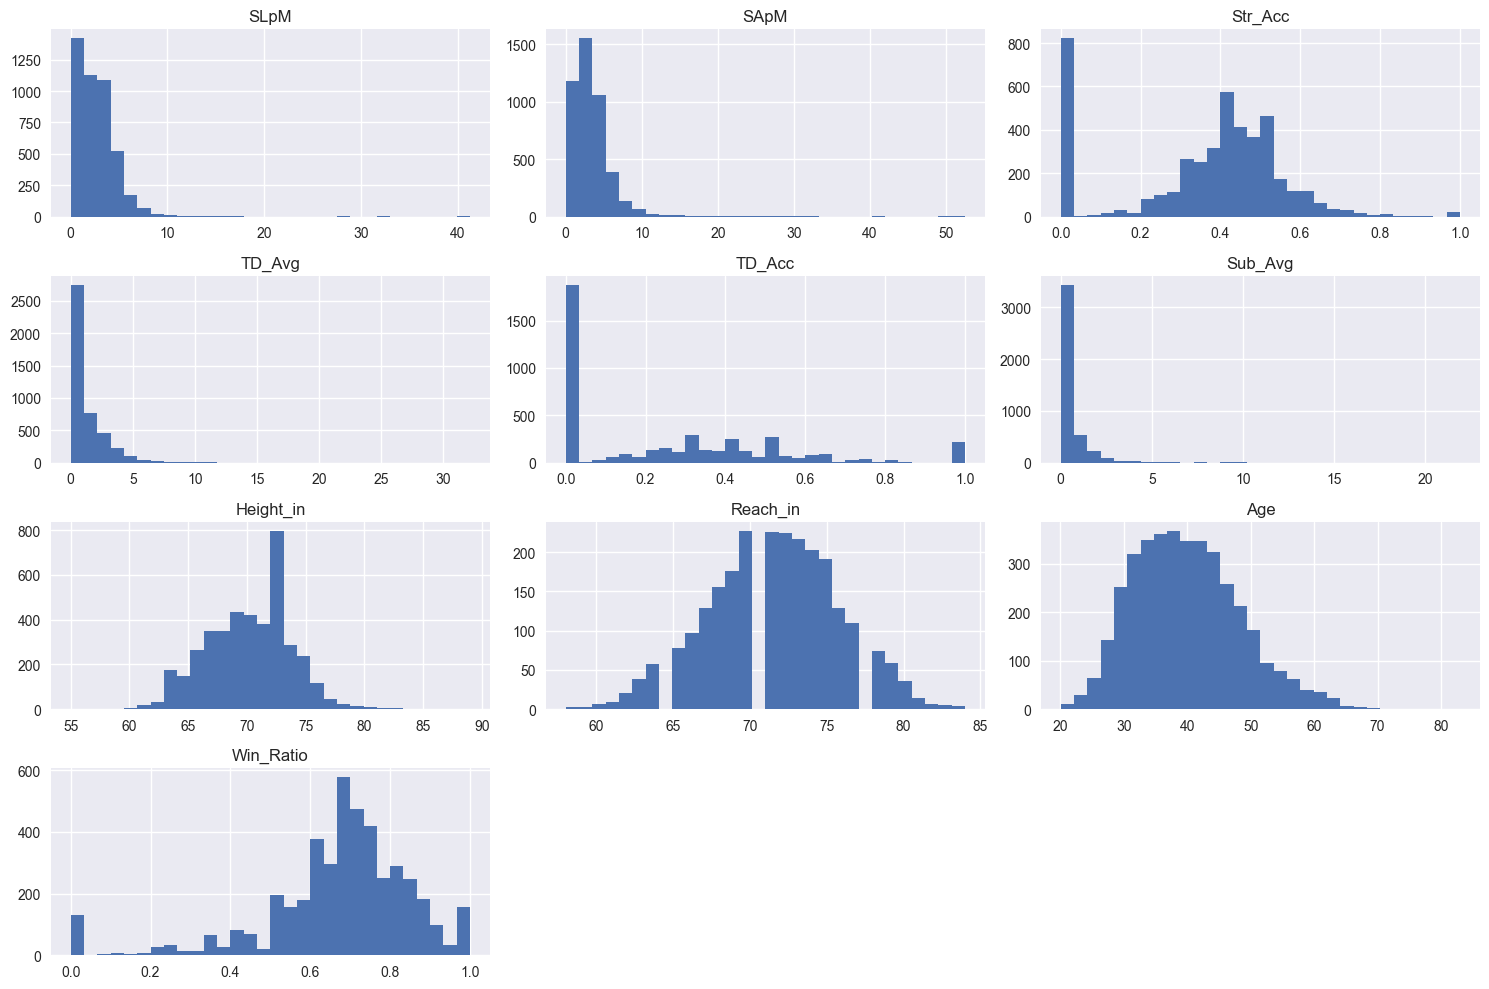

In [30]:
# Distribution plots

features = [
    "SLpM", "SApM", "Str_Acc", "TD_Avg",
    "TD_Acc", "Sub_Avg", "Height_in",
    "Reach_in", "Age", "Win_Ratio"
]

df[features].hist(figsize=(15, 10), bins=30)
plt.tight_layout()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

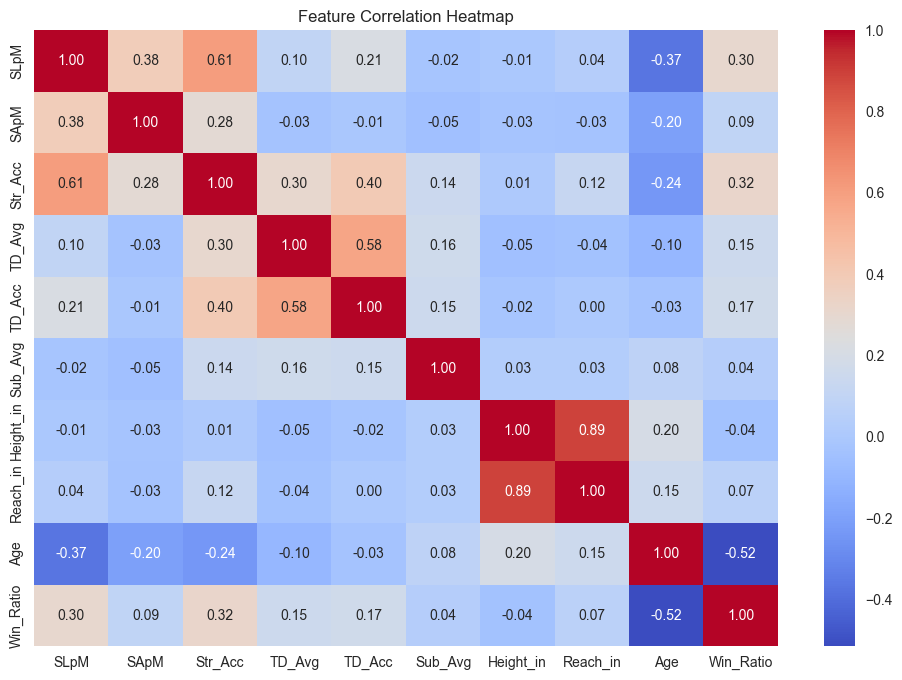

In [31]:
# Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")

In [32]:
df.columns

Index(['Name', 'Nickname', 'Wins', 'Losses', 'Draws', 'Height', 'Weight',
       'Reach', 'Stance', 'DOB', 'SLpM', 'Str_Acc', 'SApM', 'Str_Def',
       'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg', 'Active_Status', 'URL',
       'Height_in', 'Weight_lbs', 'Reach_in', 'Total_Fights', 'Win_Ratio',
       'Age'],
      dtype='object')

In [33]:
# Final Feature Selection

final_features = [
    "SLpM", "SApM", "Str_Acc", "Str_Def",
    "TD_Avg", "TD_Acc", "TD_Def", "Sub_Avg",
    "Height_in", "Reach_in", "Age",
    "Win_Ratio", "Total_Fights"
]

df_final = df[final_features]

In [34]:
# Save Clean Data

df_final.to_csv("../data/processed/fighters_clean.csv", index=False)